In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle # used to create soccer goal
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
data = {
     'Shot': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100],
     'Strength': ['Low', 'High', 'Mid', 'Low', 'Low', 'Low', 'Low', 'Mid', 'High', 'High', 'High', 'Mid', 'Low', 'High', 'Mid', 'High', 'Mid', 'Mid', 'Mid', 'Mid', 'High', 'Low', 'Low', 'Mid', 'High', 'Mid', 'Low', 'High', 'High', 'Low', 'Low', 'Mid', 'Low', 'Low', 'Low', 'High', 'Low', 'Low', 'High', 'Mid', 'Low', 'High', 'Low', 'High', 'Low', 'Mid', 'Mid', 'Mid', 'Mid', 'High', 'Low', 'High', 'Mid', 'Mid', 'Low', 'High', 'Mid', 'Low', 'Mid', 'Mid', 'Low', 'Mid', 'High', 'Low', 'Low', 'Mid', 'High', 'Low', 'High', 'High', 'High', 'Mid', 'High', 'High', 'Low', 'High', 'Mid', 'Low', 'High', 'Low', 'Low', 'High', 'Mid', 'Low', 'High', 'High', 'High', 'Mid', 'High', 'Low', 'Mid', 'High', 'High', 'High', 'Mid', 'High', 'Mid', 'High', 'Mid', 'Low'],
     'Outcome': ['Goal', 'Goal', 'Goal', 'Goal', 'Miss', 'Goal', 'Goal', 'Goal', 'Goal', 'Goal', 'Goal', 'Goal', 'Save', 'Save', 'Save', 'Goal', 'Miss', 'Goal', 'Goal', 'Goal', 'Miss', 'Goal', 'Goal', 'Goal', 'Goal', 'Goal', 'Goal', 'Goal', 'Miss', 'Goal', 'Goal', 'Goal', 'Goal', 'Goal', 'Save', 'Goal', 'Save', 'Save', 'Goal', 'Miss', 'Goal', 'Goal', 'Goal', 'Save', 'Save', 'Goal', 'Save', 'Goal', 'Goal', 'Goal', 'Goal', 'Miss', 'Miss', 'Goal', 'Goal', 'Goal', 'Goal', 'Goal', 'Goal', 'Goal', 'Miss', 'Miss', 'Goal', 'Goal', 'Save', 'Goal', 'Goal', 'Goal', 'Save', 'Miss', 'Goal', 'Goal', 'Goal', 'Goal', 'Save', 'Goal', 'Goal', 'Goal', 'Goal', 'Goal', 'Goal', 'Save', 'Goal', 'Goal', 'Goal', 'Miss', 'Miss', 'Goal', 'Goal', 'Save', 'Goal', 'Goal', 'Miss', 'Goal', 'Miss', 'Goal', 'Miss', 'Miss', 'Goal', 'Goal'],
     'x': [-3.2, 3.5, 2.1, -2.2, 3, 3.25, 0.75, -0.9, 2.5, -1.5, 3.5, -3.2, 2.3, 0.9, 1.75, 3.8, -0.9, 3.9, -2.75, -0.75, -2.75, 3.25, -3.2, -2.1, 3.8, -3.9, -1.9, 3.55, 5.6, 3.1, 3.9, 3.75, -1.8, 3.2, -1, 2.3, 2.6, 0, -3.9, 4.2, 1.9, -3, 3.6, 2.7, -0.9, 3.9, -2.4, 3.2, -3, 3.7, -1.9, 4, 3.4, -3.2, -0.2, -2.9, 2.9, 3.2, 2.1, -3.4, -4, 3.6, -3, 3.3, 2.7, -2.7, 3.4, 3.7, 1.2, -2.1, -3.2, -3.1, -3.4, 3.5, -2.9, -3, 3, -2.3, 2.6, 2.8, 0.2, -0.1, 3.4, -3.8, 3.5, -3, 4.3, 3.1, -3.1, 2.2, 3.2, 2.5, -1.6, 3.7, -4.4, 3.2, -4.5, 4, 3.7, 3.2],
     'y': [0.3, 2.6, 0.1, 0.2, 3.1, 1.25, 0.8, 0.75, 1.1, 2.2, 1.75, 1.1, 0, 0.75, 0.75, 0.5, 2.65, 0, 1.7, 0.4, 3.5, 0, 0, 0.3, 2.55, 0, 0.1, 1.6, 0.9, 0, 1.1, 0, 0.1, 0, 0, 0.2, 0, 0, 0.9, 0, 0, 0.8, 0.1, 1, 0, 0.7, 0.4, 0.1, 0.3, 0.6, 0.3, 2.3, 2.67, 1.7, 1.4, 1.9, 2.1, 0.2, 1.2, 1.1, 1, 3.2, 2.1, 0, 1.9, 0.1, 1.5, 0.2, 0.2, 2.65, 2.2, 0.1, 0.2, 2.1, 0.1, 1.1, 2.2, 1, 2.2, 0, 2.3, 2.8, 1.2, 0.1, 2.6, 2.9, 2.6, 1.6, 2, 0.2, 0.6, 2.5, 2.9, 2.3, 0.3, 2.1, 0.1, 2.5, 2.5, 0]
}

shots = pd.DataFrame(data)

In [3]:
def draw_goal(ax=None, color='black', lw=3):
    if ax is None:
        ax = plt.gca()
    goal = Rectangle((-4, -0.1), 8, 2.77, linewidth=lw, color=color, fill=False) # soccer goal drawing
    # (distance from center, shift for aesthetic purposes) width (yd), height + 0.1 (yd) [does not affect plotting]
    area_elements = [goal]
    for element in area_elements:
        ax.add_patch(element)
    return ax

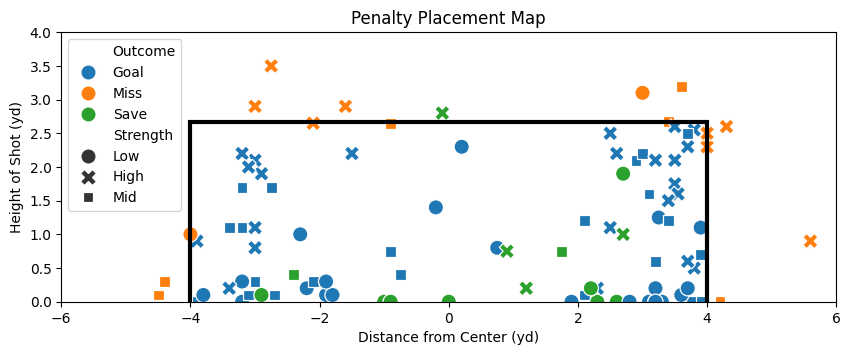

In [4]:
plt.figure(figsize=(10,3.5)) # distortion
sns.scatterplot(x=shots['x'], y=shots['y'], hue=shots['Outcome'], style=shots['Strength'], s=120) # location of shot
draw_goal() # draws soccer goal
plt.xlim(-6, 6) # width of graph
plt.ylim(0, 4) # height of graph
plt.xlabel('Distance from Center (yd)')
plt.ylabel('Height of Shot (yd)')
plt.title('Penalty Placement Map')
plt.legend(loc='upper left')
plt.show()

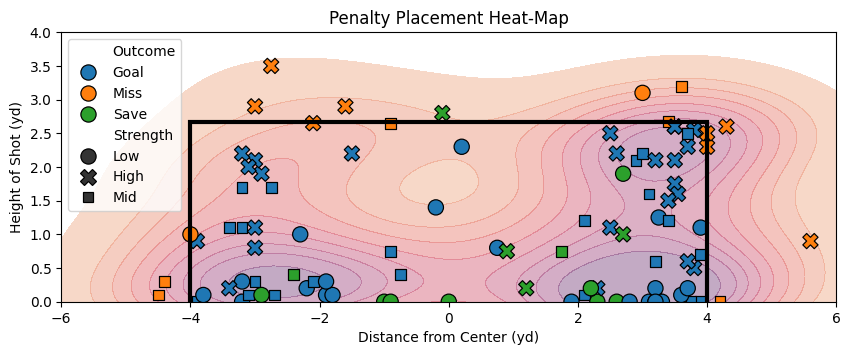

In [5]:
plt.figure(figsize=(10,3.5)) # distortion
sns.kdeplot(x=shots['x'], y=shots['y'], fill=True, cmap="flare", alpha=0.4) # heat-map
sns.scatterplot(x=shots['x'], y=shots['y'], hue=shots['Outcome'], style=shots['Strength'], s=120, edgecolor='black') # location of shot
draw_goal() # draws soccer goal
plt.xlim(-6, 6) # width of graph
plt.ylim(0, 4) # height of graph
plt.xlabel('Distance from Center (yd)')
plt.ylabel('Height of Shot (yd)')
plt.title('Penalty Placement Heat-Map')
plt.legend(loc='upper left')
plt.show()

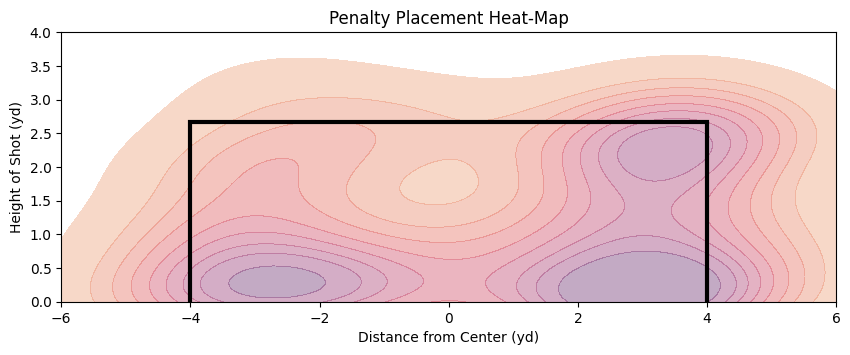

In [7]:
plt.figure(figsize=(10,3.5)) # distortion
sns.kdeplot(x=shots['x'], y=shots['y'], fill=True, cmap="flare", alpha=0.4) # heat-map
draw_goal() # draws soccer goal
plt.xlim(-6, 6) # width of graph
plt.ylim(0, 4) # height of graph
plt.xlabel('Distance from Center (yd)')
plt.ylabel('Height of Shot (yd)')
plt.title('Penalty Placement Heat-Map')
plt.show()

In [8]:
# [shot num, strength, outcome, x-coordinate, y-coordinate]
# [   0,        1,       2,         3,            4]
data1 = [
    [1, 'Low', 'Goal', -3.2, 0.3],
    [2, 'High', 'Goal', 3.5, 2.6],
    [3, 'Mid', 'Goal', 2.1, 0.1],
    [4, 'Low', 'Goal', -2.2, 0.2],
    [5, 'Low', 'Miss', 3, 3.1],
    [6, 'Low', 'Goal', 3.25, 1.25],
    [7, 'Low', 'Goal', 0.75, 0.8],
    [8, 'Mid', 'Goal', -0.9, 0.75],
    [9, 'High', 'Goal', 2.5, 1.1],
    [10, 'High', 'Goal', -1.5, 2.2],
    [11, 'High', 'Goal', 3.5, 1.75],
    [12, 'Mid', 'Goal', -3.2, 1.1],
    [13, 'Low', 'Save', 2.3, 0],
    [14, 'High', 'Save', 0.9, 0.75],
    [15, 'Mid', 'Save', 1.75, 0.75],
    [16, 'High', 'Goal', 3.8, 0.5],
    [17, 'Mid', 'Miss', -0.9, 2.65],
    [18, 'Mid', 'Goal', 3.9, 0],
    [19, 'Mid', 'Goal', -2.75, 1.7],
    [20, 'Mid', 'Goal', -0.75, 0.4],
    [21, 'High', 'Miss', -2.75, 3.5],
    [22, 'Low', 'Goal', 3.25, 0],
    [23, 'Low', 'Goal', -3.2, 0],
    [24, 'Mid', 'Goal', -2.1, 0.3],
    [25, 'High', 'Goal', 3.8, 2.55],
    [26, 'Mid', 'Goal', -3.9, 0],
    [27, 'Low', 'Goal', -1.9, 0.1],
    [28, 'High', 'Goal', 3.55, 1.6],
    [29, 'High', 'Miss', 5.6, 0.9],
    [30, 'Low', 'Goal', 3.1, 0],
    [31, 'Low', 'Goal', 3.9, 1.1],
    [32, 'Mid', 'Goal', 3.75, 0],
    [33, 'Low', 'Goal', -1.8, 0.1],
    [34, 'Low', 'Goal', 3.2, 0],
    [35, 'Low', 'Save', -1, 0],
    [36, 'High', 'Goal', 2.3, 0.2],
    [37, 'Low', 'Save', 2.6, 0],
    [38, 'Low', 'Save', 0, 0],
    [39, 'High', 'Goal', -3.9, 0.9],
    [40, 'Mid', 'Miss', 4.2, 0],
    [41, 'Low', 'Goal', 1.9, 0],
    [42, 'High', 'Goal', -3, 0.8],
    [43, 'Low', 'Goal', 3.6, 0.1],
    [44, 'High', 'Save', 2.7, 1],
    [45, 'Low', 'Save', -0.9, 0],
    [46, 'Mid', 'Goal', 3.9, 0.7],
    [47, 'Mid', 'Save', -2.4, 0.4],
    [48, 'Mid', 'Goal', 3.2, 0.1],
    [49, 'Mid', 'Goal', -3, 0.3],
    [50, 'High', 'Goal', 3.7, 0.6],
    [51, 'Low', 'Goal', -1.9, 0.3],
    [52, 'High', 'Miss', 4, 2.3],
    [53, 'Mid', 'Miss', 3.4, 2.67],
    [54, 'Mid', 'Goal', -3.2, 1.7],
    [55, 'Low', 'Goal', -0.2, 1.4],
    [56, 'High', 'Goal', -2.9, 1.9],
    [57, 'Mid', 'Goal', 2.9, 2.1],
    [58, 'Low', 'Goal', 3.2, 0.2],
    [59, 'Mid', 'Goal', 2.1, 1.2],
    [60, 'Mid', 'Goal', -3.4, 1.1],
    [61, 'Low', 'Miss', -4, 1],
    [62, 'Mid', 'Miss', 3.6, 3.2],
    [63, 'High', 'Goal', -3, 2.1],
    [64, 'Low', 'Goal', 3.3, 0],
    [65, 'Low', 'Save', 2.7, 1.9],
    [66, 'Mid', 'Goal', -2.7, 0.1],
    [67, 'High', 'Goal', 3.4, 1.5],
    [68, 'Low', 'Goal', 3.7, 0.2],
    [69, 'High', 'Save', 1.2, 0.2],
    [70, 'High', 'Miss', -2.1, 2.65],
    [71, 'High', 'Goal', -3.2, 2.2],
    [72, 'Mid', 'Goal', -3.1, 0.1],
    [73, 'High', 'Goal', -3.4, 0.2],
    [74, 'High', 'Goal', 3.5, 2.1],
    [75, 'Low', 'Save', -2.9, 0.1],
    [76, 'High', 'Goal', -3, 1.1],
    [77, 'Mid', 'Goal', 3, 2.2],
    [78, 'Low', 'Goal', -2.3, 1],
    [79, 'High', 'Goal', 2.6, 2.2],
    [80, 'Low', 'Goal', 2.8, 0],
    [81, 'Low', 'Goal', 0.2, 2.3],
    [82, 'High', 'Save', -0.1, 2.8],
    [83, 'Mid', 'Goal', 3.4, 1.2],
    [84, 'Low', 'Goal', -3.8, 0.1],
    [85, 'High', 'Goal', 3.5, 2.6],
    [86, 'High', 'Miss', -3, 2.9],
    [87, 'High', 'Miss', 4.3, 2.6],
    [88, 'Mid', 'Goal', 3.1, 1.6],
    [89, 'High', 'Goal', -3.1, 2],
    [90, 'Low', 'Save', 2.2, 0.2],
    [91, 'Mid', 'Goal', 3.2, 0.6],
    [92, 'High', 'Goal', 2.5, 2.5],
    [93, 'High', 'Miss', -1.6, 2.9],
    [94, 'High', 'Goal', 3.7, 2.3],
    [95, 'Mid', 'Miss', -4.4, 0.3],
    [96, 'High', 'Goal', 3.2, 2.1],
    [97, 'Mid', 'Miss', -4.5, 0.1],
    [98, 'High', 'Miss', 4, 2.5],
    [99, 'Mid', 'Goal', 3.7, 2.5],
    [100, 'Low', 'Goal', 3.2, 0]
]
# [shot num, strength, outcome, x-coordinate, y-coordinate]
# [   0,        1,       2,         3,            4]
shots1 = pd.DataFrame(data1, columns=['Shot', 'Strength', 'Outcome', 'x', 'y'])

In [9]:
shot_num=[]

for shot in data1:
    if shot[2]=='Goal':
        shot_num.append(shot[0]-1)
print(shot_num)

[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 15, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 35, 38, 40, 41, 42, 45, 47, 48, 49, 50, 53, 54, 55, 56, 57, 58, 59, 62, 63, 65, 66, 67, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 82, 83, 84, 87, 88, 90, 91, 93, 95, 98, 99]


In [10]:
data_goal = shots1.loc[shot_num]
print(data_goal)

    Shot Strength Outcome     x     y
0      1      Low    Goal -3.20  0.30
1      2     High    Goal  3.50  2.60
2      3      Mid    Goal  2.10  0.10
3      4      Low    Goal -2.20  0.20
5      6      Low    Goal  3.25  1.25
..   ...      ...     ...   ...   ...
91    92     High    Goal  2.50  2.50
93    94     High    Goal  3.70  2.30
95    96     High    Goal  3.20  2.10
98    99      Mid    Goal  3.70  2.50
99   100      Low    Goal  3.20  0.00

[70 rows x 5 columns]


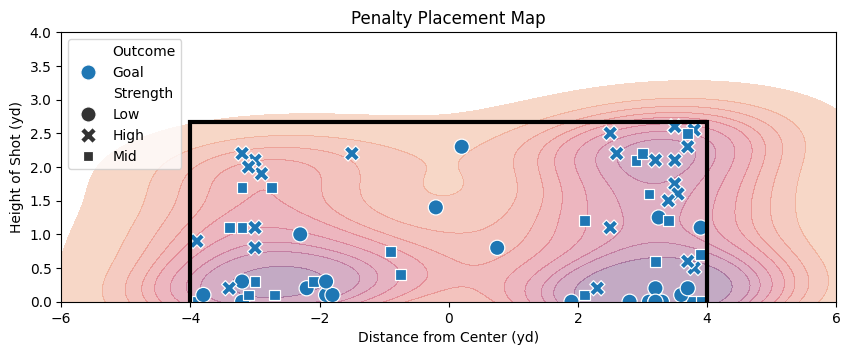

In [11]:
plt.figure(figsize=(10,3.5)) # distortion
sns.kdeplot(x=data_goal['x'], y=data_goal['y'], fill=True, cmap="flare", alpha=0.4) # heat-map
sns.scatterplot(x=data_goal['x'], y=data_goal['y'], hue=data_goal['Outcome'], style=data_goal['Strength'], s=120) # location of shot
draw_goal() # draws soccer goal
plt.xlim(-6, 6) # width of graph
plt.ylim(0, 4) # height of graph
plt.xlabel('Distance from Center (yd)')
plt.ylabel('Height of Shot (yd)')
plt.title('Penalty Placement Map')
plt.legend(loc='upper left')
plt.show()

In [12]:
shot_num=[]

for shot in data1:
    if shot[2]=='Save':
        shot_num.append(shot[0]-1)
data_save = shots1.loc[shot_num]
print(data_save)

    Shot Strength Outcome     x     y
12    13      Low    Save  2.30  0.00
13    14     High    Save  0.90  0.75
14    15      Mid    Save  1.75  0.75
34    35      Low    Save -1.00  0.00
36    37      Low    Save  2.60  0.00
37    38      Low    Save  0.00  0.00
43    44     High    Save  2.70  1.00
44    45      Low    Save -0.90  0.00
46    47      Mid    Save -2.40  0.40
64    65      Low    Save  2.70  1.90
68    69     High    Save  1.20  0.20
74    75      Low    Save -2.90  0.10
81    82     High    Save -0.10  2.80
89    90      Low    Save  2.20  0.20


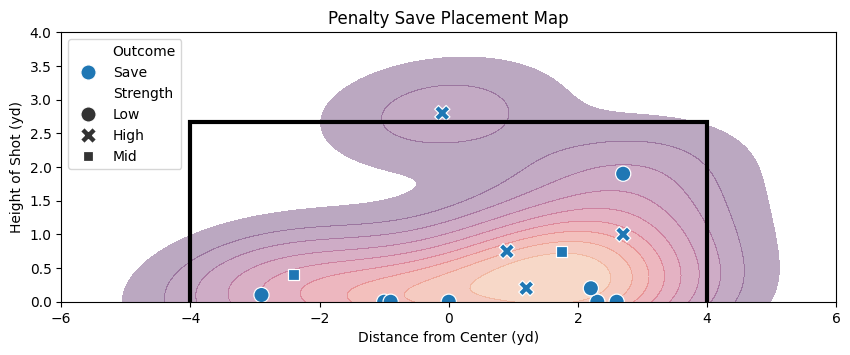

In [13]:
plt.figure(figsize=(10,3.5)) # distortion
sns.kdeplot(x=data_save['x'], y=data_save['y'], fill=True, cmap="flare_r", alpha=0.4) # heat-map
sns.scatterplot(x=data_save['x'], y=data_save['y'], hue=data_save['Outcome'], style=data_save['Strength'], s=120) # location of shot
draw_goal() # draws soccer goal
plt.xlim(-6, 6) # width of graph
plt.ylim(0, 4) # height of graph
plt.xlabel('Distance from Center (yd)')
plt.ylabel('Height of Shot (yd)')
plt.title('Penalty Save Placement Map')
plt.legend(loc='upper left')
plt.show()

In [14]:
shot_num=[]

for shot in data1:
    if shot[2]=='Miss':
        shot_num.append(shot[0]-1)
data_miss = shots1.loc[shot_num]
print(data_miss)

    Shot Strength Outcome     x     y
4      5      Low    Miss  3.00  3.10
16    17      Mid    Miss -0.90  2.65
20    21     High    Miss -2.75  3.50
28    29     High    Miss  5.60  0.90
39    40      Mid    Miss  4.20  0.00
51    52     High    Miss  4.00  2.30
52    53      Mid    Miss  3.40  2.67
60    61      Low    Miss -4.00  1.00
61    62      Mid    Miss  3.60  3.20
69    70     High    Miss -2.10  2.65
85    86     High    Miss -3.00  2.90
86    87     High    Miss  4.30  2.60
92    93     High    Miss -1.60  2.90
94    95      Mid    Miss -4.40  0.30
96    97      Mid    Miss -4.50  0.10
97    98     High    Miss  4.00  2.50


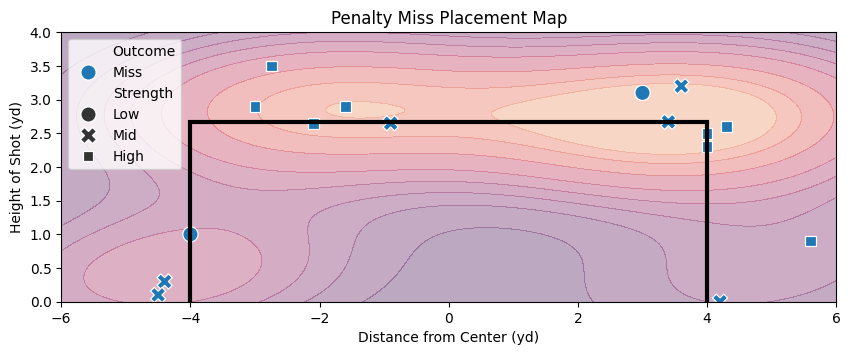

In [15]:
plt.figure(figsize=(10,3.5)) # distortion
sns.kdeplot(x=data_miss['x'], y=data_miss['y'], fill=True, cmap="flare_r", alpha=0.4) # heat-map
sns.scatterplot(x=data_miss['x'], y=data_miss['y'], hue=data_miss['Outcome'], style=data_miss['Strength'], s=120) # location of shot
draw_goal() # draws soccer goal
plt.xlim(-6, 6) # width of graph
plt.ylim(0, 4) # height of graph
plt.xlabel('Distance from Center (yd)')
plt.ylabel('Height of Shot (yd)')
plt.title('Penalty Miss Placement Map')
plt.legend(loc='upper left')
plt.show()

In [16]:
# data
XY = np.array([[-3.2, 0.3], [3.5, 2.6], [2.1, 0.1], [-2.2, 0.2], [3, 3.1], [3.25, 1.25], [0.75, 0.8], [-0.9, 0.75], [2.5, 1.1], [-1.5, 2.2], [3.5, 1.75], [-3.2, 1.1], [2.3, 0], [0.9, 0.75], [1.75, 0.75], [3.8, 0.5], [-0.9, 2.65], [3.9, 0], [-2.75, 1.7], [-0.75, 0.4], [-2.75, 3.5], [3.25, 0], [-3.2, 0], [-2.1, 0.3], [3.8, 2.55], [-3.9, 0], [-1.9, 0.1], [3.55, 1.6], [5.6, 0.9], [3.1, 0], [3.9, 1.1], [3.75, 0], [-1.8, 0.1], [3.2, 0], [-1, 0], [2.3, 0.2], [2.6, 0], [0, 0], [-3.9, 0.9], [4.2, 0], [1.9, 0], [-3, 0.8], [3.6, 0.1], [2.7, 1], [-0.9, 0], [3.9, 0.7], [-2.4, 0.4], [3.2, 0.1], [-3, 0.3], [3.7, 0.6], [-1.9, 0.3], [4, 2.3], [3.4, 2.67], [-3.2, 1.7], [-0.2, 1.4], [-2.9, 1.9], [2.9, 2.1], [3.2, 0.2], [2.1, 1.2], [-3.4, 1.1], [-4, 1], [3.6, 3.2], [-3, 2.1], [3.3, 0], [2.7, 1.9], [-2.7, 0.1], [3.4, 1.5], [3.7, 0.2], [1.2, 0.2], [-2.1, 2.65], [-3.2, 2.2], [-3.1, 0.1], [-3.4, 0.2], [3.5, 2.1], [-2.9, 0.1], [-3, 1.1], [3, 2.2], [-2.3, 1], [2.6, 2.2], [2.8, 0], [0.2, 2.3], [-0.1, 2.8], [3.4, 1.2], [-3.8, 0.1], [3.5, 2.6], [-3, 2.9], [4.3, 2.6], [3.1, 1.6], [-3.1, 2], [2.2, 0.2], [3.2, 0.6], [2.5, 2.5], [-1.6, 2.9], [3.7, 2.3], [-4.4, 0.3], [3.2, 2.1], [-4.5, 0.1], [4, 2.5], [3.7, 2.5], [3.2, 0]]) # x, y coordinates
y = np.array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1])  # 1 for goal, 0 for no goal

# location of shot
def create_features(x, y):
    distance = np.sqrt(float(x)**2 + float(y)**2)  # distance from center
    return np.array([distance])

XY_features = np.array([create_features(XY, y) for XY, y in zip(XY[:, 0], XY[:, 1])]) # features

# training the model
model = LogisticRegression()
model.fit(XY_features, y)

# prediction
new_x = input('Enter x(yd) coordinate: ')
new_y = input('Enter y(yd) coordinate: ')
new_features = create_features(new_x, new_y)
probability = model.predict_proba(new_features.reshape(1, -1))[0, 1]

if float(new_x) > 4:
  probability = 0 # probability of scoring if you shoot outside the goal area
if float(new_x) < -4:

  probability = 0 # probability of scoring if you shoot outside the goal area
if float(new_y) < 0:
  probability = 0 # probability of scoring if you shoot outside the goal area
if float(new_y) > 2.67:
  probability = 0 # probability of scoring if you shoot outside the goal area
print(f"Probability of Scoring: {probability}")

Probability of Scoring: 0.6551205425065179
